# Projet de Classification d'Images CIFAR-10 avec Transfer Learning


Ce projet se concentre sur la classification d'images en utilisant la base de données CIFAR-10. L'objectif est de développer des modèles de machine learning capables de prédire à quelles classes appartiennent les images de cette base de données. De plus, la puissante technique du Transfer Learning sera explorée pour améliorer les performances des modèles.



## Description de la Base de Données



La base de données CIFAR-10 contient 60 000 images couleur (32x32 pixels) réparties en 10 classes, avec 6 000 images par classe. Les classes comprennent des objets courants tels que des avions, des automobiles, des oiseaux, des chats, des cerfs, des chiens, des grenouilles, des chevaux, des bateaux et des camions.




## Objectif

L'objectif de ce projet est de développer deux modèles de machine learning pour effectuer la classification d'images sur la base de données CIFAR-10. Deux types de modèles seront utilisés : un Perceptron Multicouche (MLP) et un réseau de neurones convolutifs (CNN). De plus, le Transfer Learning sera exploré pour évaluer son impact sur les performances des modèles.




## Étapes du Projet

1. **Exploration des Données** : L'exploration de la base de données CIFAR-10 permettra une meilleure compréhension des données.

2. **Prétraitement des Données** : Les données seront prétraitées, y compris la normalisation des pixels des images et d'autres étapes de prétraitement si nécessaire.

3. **Modèle MLP** : Un modèle Perceptron Multicouche (MLP) sera construit pour la classification d'images.

4. **Modèle CNN** : Un réseau de neurones convolutifs (CNN) sera construit pour la classification d'images.

5. **Transfer Learning** : Le Transfer Learning sera exploré en utilisant un modèle pré-entraîné pour la classification des images CIFAR-10, avec ajustements spécifiques à la tâche.

6. **Évaluation des Modèles** : Les performances de tous les modèles seront évaluées en utilisant les données de test, avec une comparaison des résultats.


Ce projet permet de se familiariser avec la classification d'images, de comparer les performances des modèles traditionnels (MLP et CNN) et d'explorer comment le Transfer Learning peut améliorer la classification d'images.


# Exploration des données

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10#Base de données
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:
# Classes CIFAR-10
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",
                   "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)


Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 1)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) : (10000, 1)


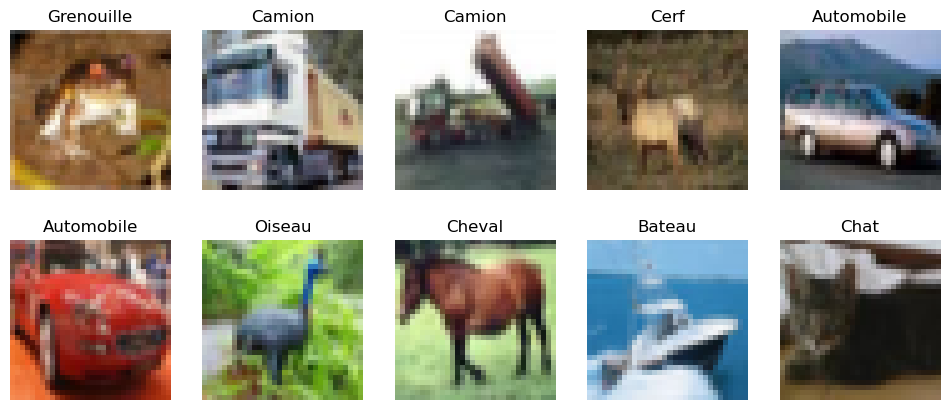

In [6]:
# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()


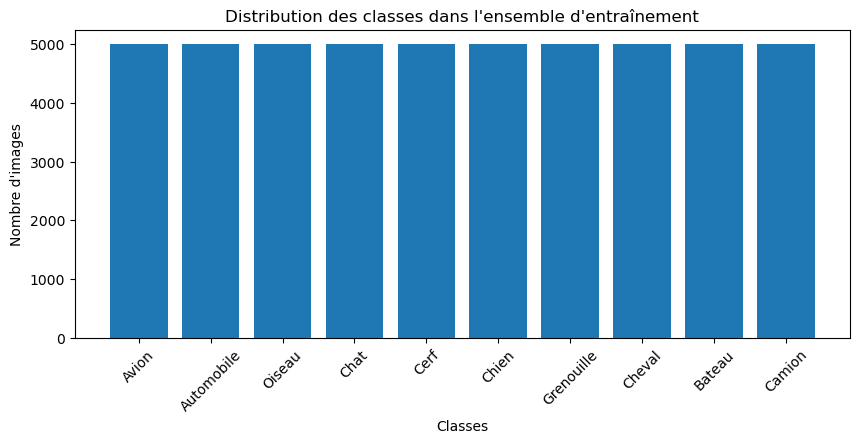

In [7]:
# Afficher la distribution des classes dans l'ensemble d'entraînement
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1
    
plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

# Prétraitement des données

In [8]:

# Normaliser les pixels des images en mettant à l'échelle entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [9]:
# Transformer les étiquettes en vecteurs one-hot (encodage catégoriel)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [10]:
# Afficher les dimensions après le prétraitement
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 10)
Forme de l'ensemble de test (étiquettes) : (10000, 10)


# Modèle MLP

## Construction du modèle

In [11]:
# Importer les bibliothèques nécessaires
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




# Définir le modèle MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Aplatir les images 32x32 en un vecteur 1D 
    layers.Flatten(input_shape=(32, 32, 3)),#3: RVB
    # Ajouter une couche cachée de 128 neurones avec une fonction d'activation ReLU
    layers.Dense(128, activation='relu'),
    # Ajouter la couche de sortie avec 10 neurones (classes CIFAR-10) et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])


In [12]:


# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_mlp.compile(optimizer='adam', # Utilisation de l'optimiseur Adam
                  loss='categorical_crossentropy', # Fonction de perte pour la classification multiclasse
                  metrics=['accuracy']) # Métrique de précision


In [13]:
# Afficher un résumé du modèle pour obtenir des informations sur les couches et les paramètres
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Entraîner le modèle MLP sur les données d'entraînement
epochs = 100  # Nombre d'époques
batch_size = 32  # Taille du batch

# Utilisation de la validation split (20% des données pour la validation)
historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')


Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 1.9230 - accuracy: 0.3131 - val_loss: 1.8046 - val_accuracy: 0.3603
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 1.7636 - accuracy: 0.3733 - val_loss: 1.7718 - val_accuracy: 0.3636
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 1.6946 - accuracy: 0.3981 - val_loss: 1.6906 - val_accuracy: 0.4015
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 1.6503 - accuracy: 0.4172 - val_loss: 1.6627 - val_accuracy: 0.4187
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 1.6203 - accuracy: 0.4236 - val_loss: 1.6308 - val_accuracy: 0.4289
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 1.5953 - accuracy: 0.4324 - val_loss: 1.6783 - val_accuracy: 0.4032
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 1.5792 - accuracy: 0.4399 - val_loss: 1.6216 - val_accuracy: 0.4241
Epoch 

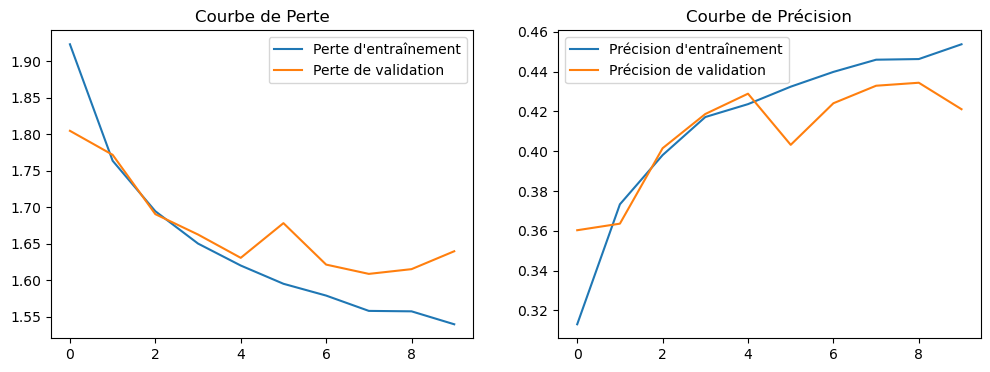

Précision sur les données de test : 42.86%


In [15]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label='Perte d\'entraînement')
plt.plot(historique.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label='Précision d\'entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')



In [16]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]


313/313 [==============================] - 0s 441us/step


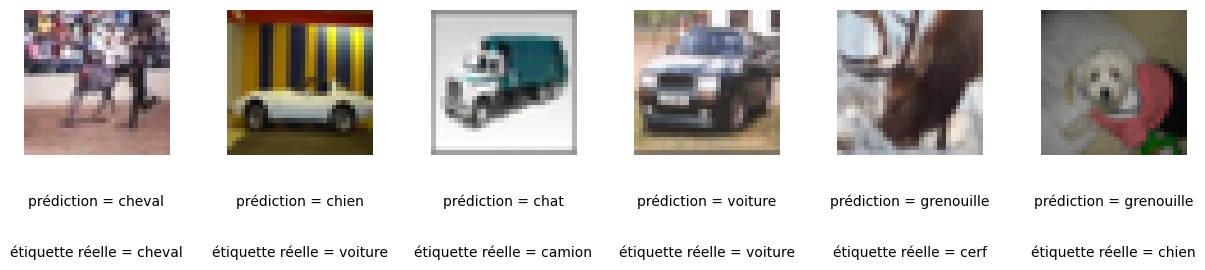

In [19]:

# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()


# Réseau de neurone convolutif

## Entrainer le modèle

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10

In [22]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

In [24]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [25]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)


Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 1.7152 - accuracy: 0.3738 - val_loss: 1.4128 - val_accuracy: 0.4998
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 1.4124 - accuracy: 0.4951 - val_loss: 1.2813 - val_accuracy: 0.5487
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 1.2760 - accuracy: 0.5437 - val_loss: 1.1436 - val_accuracy: 0.5980
Epoch 4/10
625/625 [==============================] - 7s 12ms/step - loss: 1.1926 - accuracy: 0.5764 - val_loss: 1.0815 - val_accuracy: 0.6219
Epoch 5/10
625/625 [==============================] - 7s 12ms/step - loss: 1.1166 - accuracy: 0.6058 - val_loss: 1.0532 - val_accuracy: 0.6308
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 1.0611 - accuracy: 0.6276 - val_loss: 1.0389 - val_accuracy: 0.6422
Epoch 7/10
625/625 [==============================] - 7s 12ms/step - loss: 1.0244 - accuracy: 0.6377 - val_loss: 0.9603 - val_accuracy: 0.6680

313/313 - 1s - loss: 0.9304 - accuracy: 0.6715 - 638ms/epoch - 2ms/step
Précision sur les données de test : 67.15%


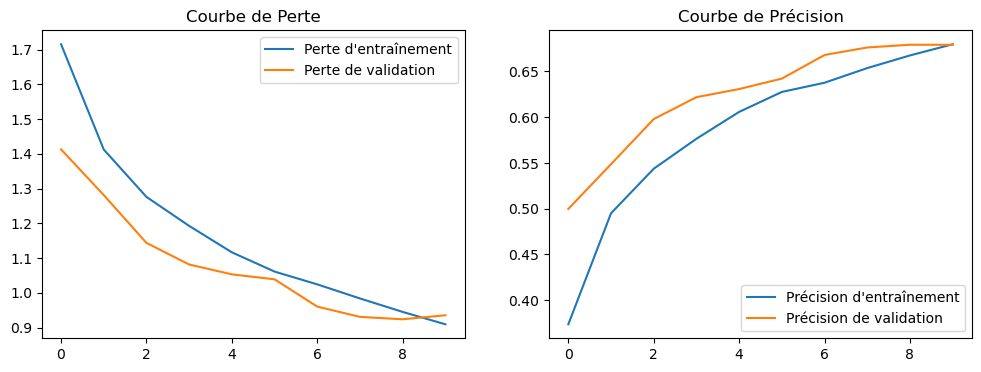

In [26]:

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [27]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]


313/313 [==============================] - 1s 2ms/step


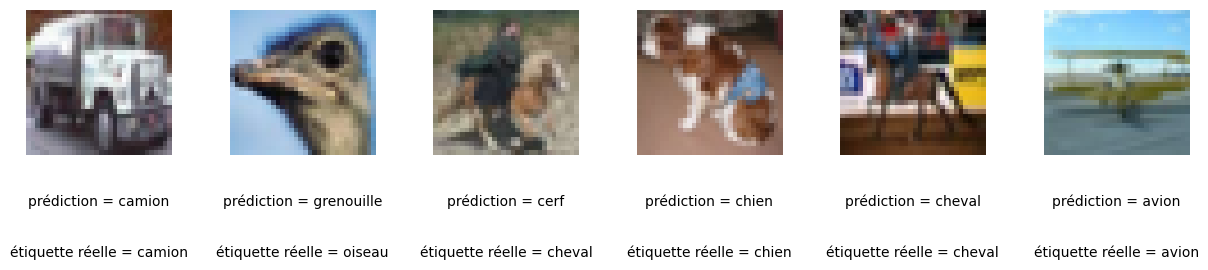

In [30]:

# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()


# Autre struture de CNN

In [33]:
# Importer les bibliothèques nécessaires
from tensorflow import keras
from tensorflow.keras import layers, models

# Définir le nombre de classes
NUM_CLASSES = 10

# Créer la structure du modèle CNN avec Batch Normalization en utilisant Sequential()
model_cnn = models.Sequential()

# Couche de convolution 1 : 32 filtres, fenêtre 3x3, activation LeakyReLU, entrée 32x32x3
model_cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding="same", input_shape=(32, 32, 3)))  # Ajouter une parenthèse ici
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 2 : 32 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(32, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 3 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de convolution 4 : 64 filtres, fenêtre 3x3, activation LeakyReLU
model_cnn.add(layers.Conv2D(64, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Aplatir les données pour les couches entièrement connectées
model_cnn.add(layers.Flatten())

# Couche dense 1 : 128 neurones, activation LeakyReLU
model_cnn.add(layers.Dense(128))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

# Couche de dropout pour la régularisation
model_cnn.add(layers.Dropout(rate=0.5))

# Couche de sortie : 10 neurones pour les classes, activation softmax
model_cnn.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Afficher un résumé du modèle
model_cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_11 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 16, 16, 32)       

In [34]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [35]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)


Epoch 1/10
625/625 [==============================] - 19s 31ms/step - loss: 1.5764 - accuracy: 0.4463 - val_loss: 1.6989 - val_accuracy: 0.4228
Epoch 2/10
625/625 [==============================] - 20s 32ms/step - loss: 1.1550 - accuracy: 0.5909 - val_loss: 1.0947 - val_accuracy: 0.6133
Epoch 3/10
625/625 [==============================] - 19s 31ms/step - loss: 1.0074 - accuracy: 0.6459 - val_loss: 1.0659 - val_accuracy: 0.6214
Epoch 4/10
625/625 [==============================] - 25s 40ms/step - loss: 0.9150 - accuracy: 0.6785 - val_loss: 0.9696 - val_accuracy: 0.6587
Epoch 5/10
625/625 [==============================] - 20s 33ms/step - loss: 0.8460 - accuracy: 0.7042 - val_loss: 1.5610 - val_accuracy: 0.5168
Epoch 6/10
625/625 [==============================] - 20s 33ms/step - loss: 0.7959 - accuracy: 0.7241 - val_loss: 0.8871 - val_accuracy: 0.6904
Epoch 7/10
625/625 [==============================] - 20s 32ms/step - loss: 0.7548 - accuracy: 0.7355 - val_loss: 0.9862 - val_accuracy:

313/313 - 2s - loss: 0.8767 - accuracy: 0.7109 - 2s/epoch - 5ms/step
Précision sur les données de test : 71.09%


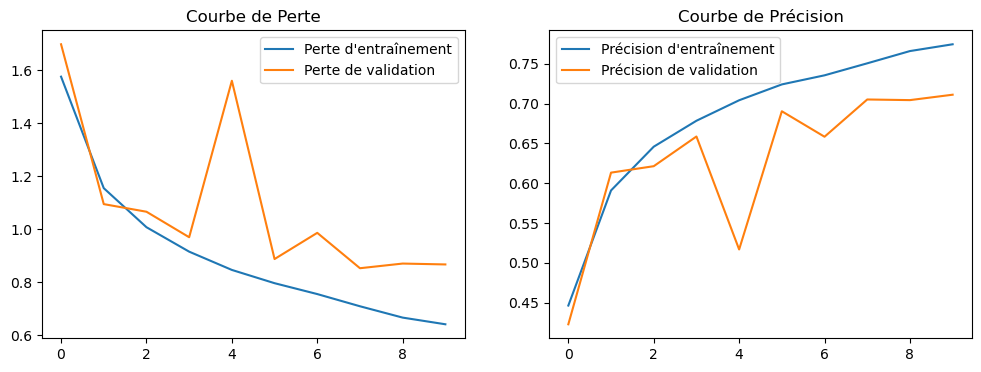

In [43]:

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [44]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]


313/313 [==============================] - 2s 5ms/step


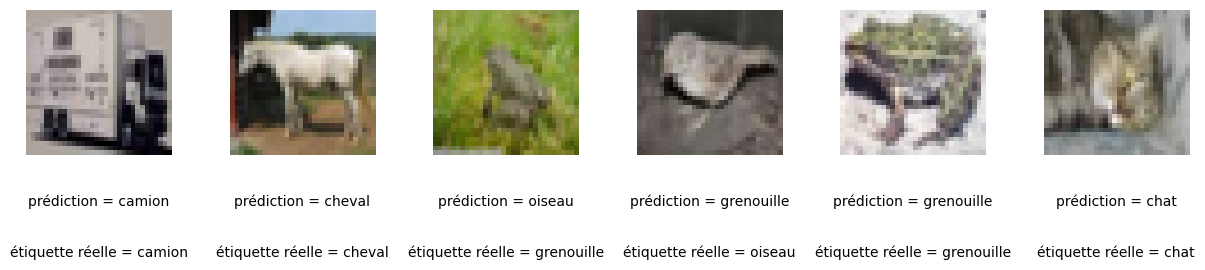

In [45]:

# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()


# Modèle en utilisant le transfert learning VGG16

Le **transfert d'apprentissage** est une technique en apprentissage automatique qui consiste à utiliser des modèles déjà entraînés sur des tâches similaires pour résoudre de nouveaux problèmes. Cette approche permet d'économiser du temps et des ressources en capitalisant sur les connaissances préalablement acquises par les modèles pré-entraînés.

Vous pouvez trouver une liste complète de **modèles pré-entraînés** en Keras [ici](https://keras.io/api/applications/). Certains exemples de modèles pré-entraînés incluent :

- [VGG16](https://keras.io/api/applications/vgg/#vgg16-function): Un modèle de vision par ordinateur pré-entraîné sur ImageNet.
- [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function): Un modèle de réseau de neurones résiduels (ResNet) pour la vision par ordinateur.
- [BERT](https://keras.io/api/applications/bert/#bert-function): Un modèle de traitement du langage naturel (NLP) pour la compréhension de texte.

Vous pouvez utiliser ces modèles comme point de départ pour vos propres projets d'apprentissage automatique et les adapter à vos besoins spécifiques.

Vous pouvez trouver une liste complète des **modèles pré-entraînés de Keras** dans la section "Applications" de la documentation Keras. Cette liste comprend des informations détaillées sur chaque modèle pré-entraîné, ainsi que des liens vers leur documentation respective.

[**Liste des modèles pré-entraînés de Keras**](https://keras.io/api/applications/)



In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10

In [38]:
# Charger le modèle pré-entraîné VGG16 (sans les couches de classification)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [39]:
# Ajouter des couches personnalisées pour la classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [40]:
# Créer le modèle complet
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches du modèle VGG16 pour empêcher leur entraînement
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_transfer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


In [41]:
# Entraîner le modèle de transfert learning sur les données d'entraînement
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_transfer.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')


Epoch 1/10
625/625 [==============================] - 76s 122ms/step - loss: 1.4887 - accuracy: 0.4759 - val_loss: 1.2695 - val_accuracy: 0.5528
Epoch 2/10
625/625 [==============================] - 75s 120ms/step - loss: 1.2804 - accuracy: 0.5512 - val_loss: 1.1997 - val_accuracy: 0.5833
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 1.2268 - accuracy: 0.5690 - val_loss: 1.1794 - val_accuracy: 0.5867
Epoch 4/10
625/625 [==============================] - 75s 121ms/step - loss: 1.1836 - accuracy: 0.5839 - val_loss: 1.1516 - val_accuracy: 0.5987
Epoch 5/10
625/625 [==============================] - 81s 130ms/step - loss: 1.1521 - accuracy: 0.5959 - val_loss: 1.1459 - val_accuracy: 0.5996
Epoch 6/10
625/625 [==============================] - 81s 129ms/step - loss: 1.1304 - accuracy: 0.6020 - val_loss: 1.1397 - val_accuracy: 0.6016
Epoch 7/10
625/625 [==============================] - 84s 134ms/step - loss: 1.1078 - accuracy: 0.6123 - val_loss: 1.1176 - val_ac

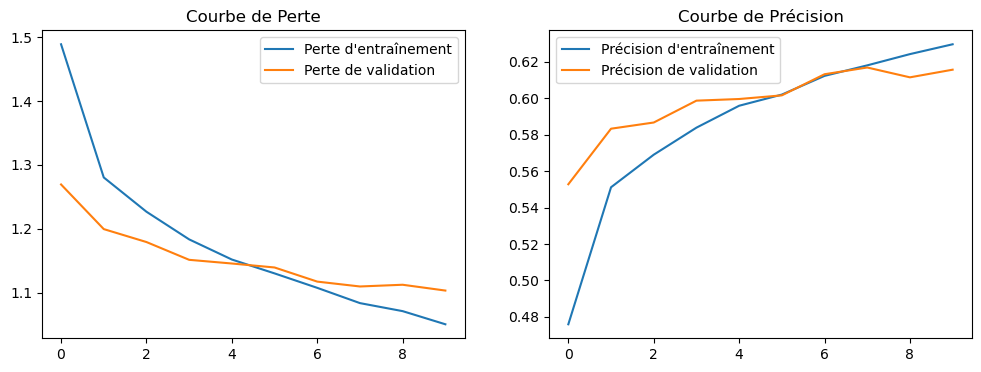

In [42]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label='Perte d\'entraînement')
plt.plot(history_transfer.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_transfer.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# Quiz

## Question 1

Quel type de réseau de neurones est principalement utilisé pour la classification d'images ?


A) CNN (Convolutional Neural Network)

B) RNN (Recurrent Neural Network)

C) MLP (Multilayer Perceptron)



## Question 2

Pourquoi ajouter des couches de dropout dans un réseau de neurones ?

A) Pour augmenter le nombre de paramètres du modèle.

B) Pour réduire le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

C) Pour accélérer le processus d'entraînement.


## Question 3

À quoi sert le transfert learning en apprentissage automatique ?

A) Transfert d'argent entre comptes bancaires

B) Utilisation de modèles pré-entraînés sur des tâches similaires pour résoudre de nouveaux problèmes

C) Transfert de fichiers entre ordinateurs